# pandas 绘图
- pandas手册 visualization部分

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import Image

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

## 一、Basic Plotting: plot

In [19]:
df = pd.DataFrame()
print(dir(df.plot))

['__bytes__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_constructor', '_dir_additions', '_dir_deletions', '_reset_cache', 'area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts[:5]

2000-01-01    0.256371
2000-01-02    0.553032
2000-01-03    0.392978
2000-01-04    1.792194
2000-01-05    0.620844
Freq: D, dtype: float64

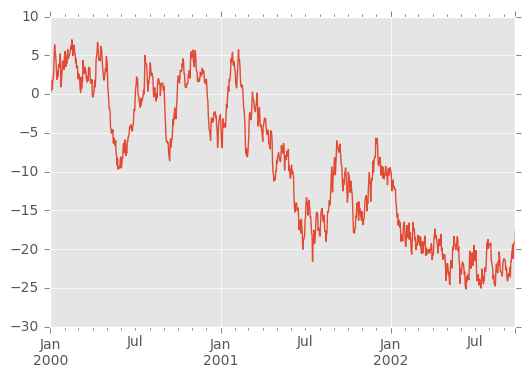

In [10]:
ts.plot()

In [32]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df[:5]

,A,B,C,D
2000-01-01,-0.089679,-0.448750,-1.026270,-1.035295
2000-01-02,-2.022157,-0.343653,-1.295769,-0.988092
2000-01-03,-2.264007,0.244507,-1.239825,1.543556
2000-01-04,-0.932298,-0.098705,0.187063,0.740013
2000-01-05,-2.099557,0.213415,1.030141,2.933909


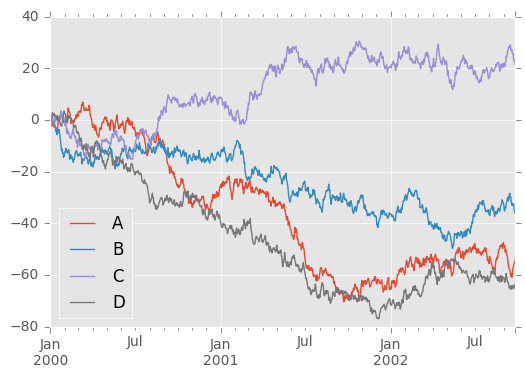

In [33]:
df.plot()

## 二、Other Plots
> - ‘bar’ or ‘barh’ for bar plots
> - ‘hist’ for histogram
> - ‘box’ for boxplot
> - ‘kde’ or 'density' for density plots
> - ‘area’ for area plots
> - ‘scatter’ for scatter plots
> - ‘hexbin’ for hexagonal bin plots
> - ‘pie’ for pie plots

### 1 条形图

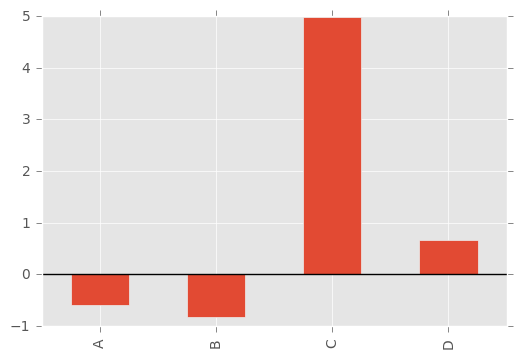

In [13]:
df.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

In [21]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2[:5]

,a,b,c,d
0,0.404078,0.793302,0.412749,0.134798
1,0.534973,0.975364,0.875194,0.013992
2,0.630928,0.055675,0.925942,0.083006
3,0.991071,0.033116,0.251463,0.906807
4,0.153307,0.022422,0.383200,0.802537


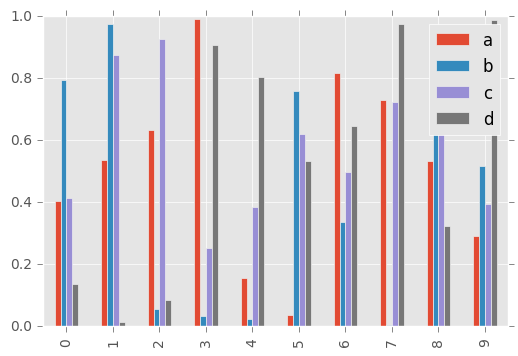

In [22]:
df2.plot.bar()

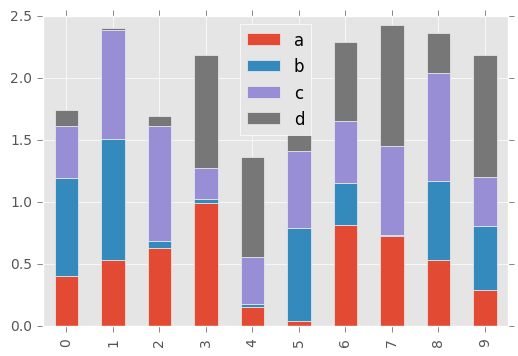

In [23]:
df2.plot.bar(stacked=True)

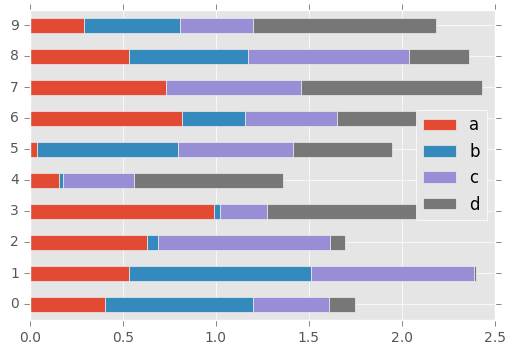

In [24]:
df2.plot.barh(stacked=True)

### 2 直方图

In [25]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4[:5]

,a,b,c
0,2.238319,-0.388103,-0.053793
1,1.217399,0.716326,-2.173713
2,0.044832,0.014574,-0.852804
3,0.573594,-1.383731,-0.558541
4,1.146927,-0.041821,-0.434449


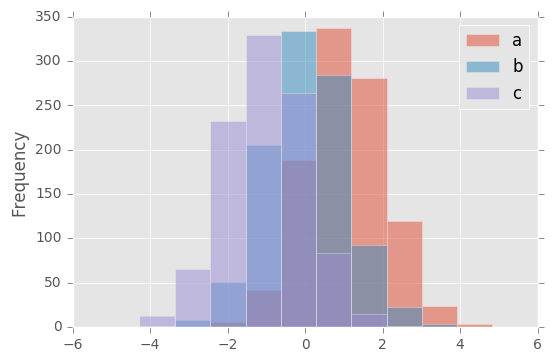

In [26]:
df4.plot.hist(alpha=0.5)

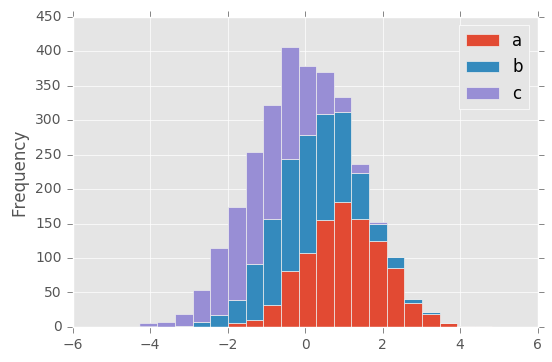

In [27]:
df4.plot.hist(stacked=True, bins=20)

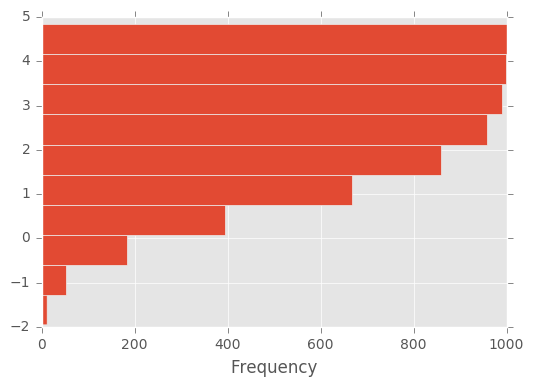

In [28]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

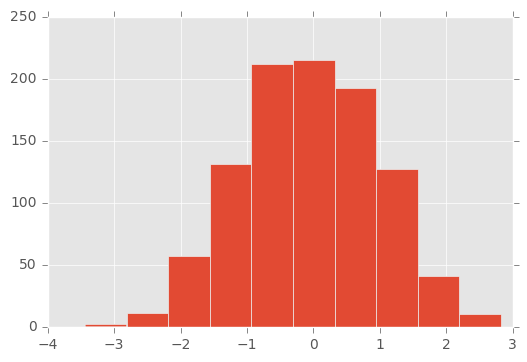

In [34]:
df['A'].diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024053CFFFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024054E087B8>]], dtype=object)

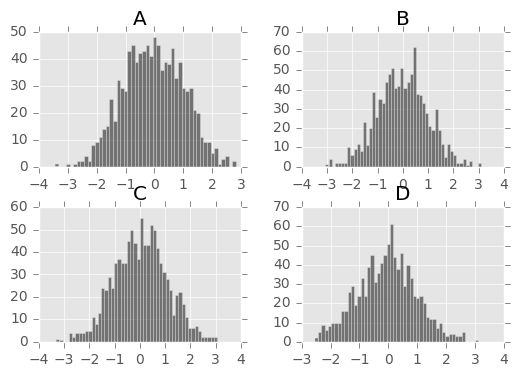

In [35]:
df.diff().hist(color='k', alpha=0.5, bins=50)

In [36]:
data = pd.Series(np.random.randn(1000))
data[:5]

0   -0.320431
1   -0.910552
2    1.160920
3   -0.405652
4    0.625692
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024054E97128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002405523DEF0>]], dtype=object)

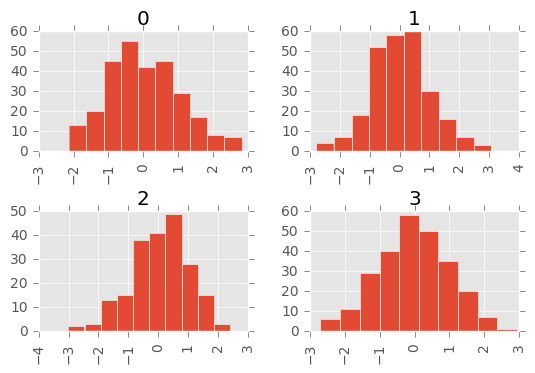

In [37]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

### 3 箱型图

In [38]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df[:5]

,A,B,C,D,E
0,0.063447,0.423332,0.457908,0.700750,0.633467
1,0.807189,0.456748,0.471324,0.897756,0.486595
2,0.344007,0.704606,0.483813,0.145670,0.588183
3,0.826825,0.760014,0.289414,0.645390,0.769001
4,0.654418,0.629104,0.584649,0.927664,0.444027


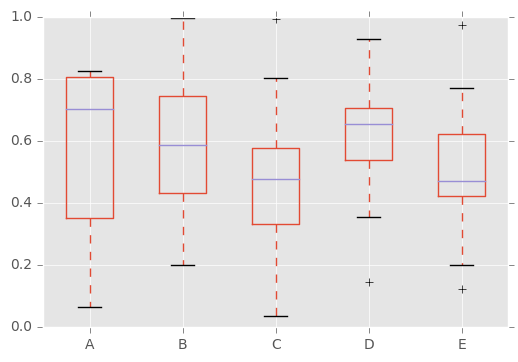

In [39]:
df.plot.box()

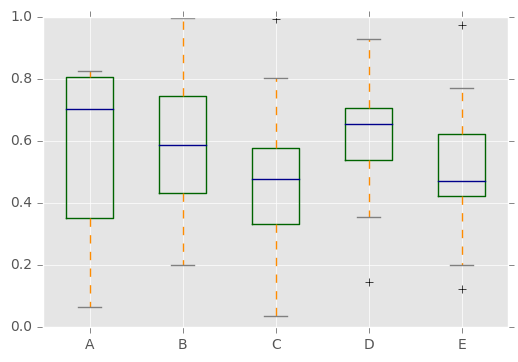

In [41]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

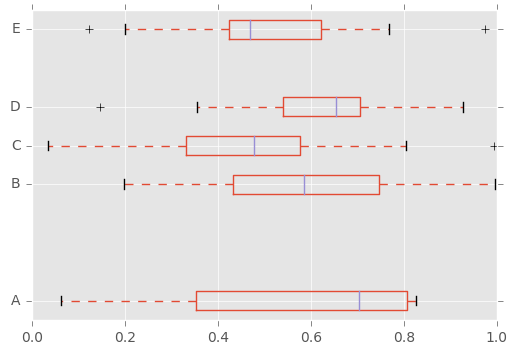

In [42]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [43]:
df = pd.DataFrame(np.random.rand(10,5))
df[:5]

,0,1,2,3,4
0,0.983737,0.199013,0.715383,0.015521,0.501715
1,0.963039,0.874412,0.461182,0.385674,0.338954
2,0.050864,0.284852,0.123632,0.324950,0.508206
3,0.746344,0.698923,0.212735,0.343611,0.581344
4,0.177909,0.497254,0.562957,0.089302,0.567329


D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


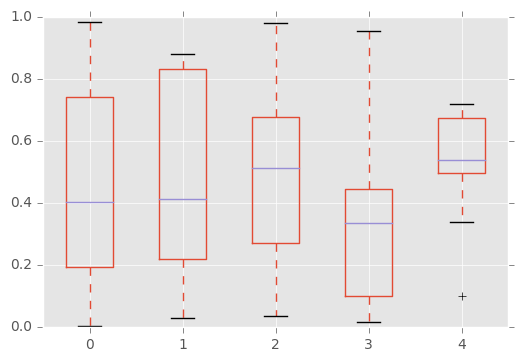

In [44]:
bp = df.boxplot()

In [46]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df[:5]

,Col1,Col2,X
0,0.894842,0.297428,A
1,0.485544,0.301350,A
2,0.872426,0.859694,A
3,0.456137,0.686230,A
4,0.976827,0.854286,A


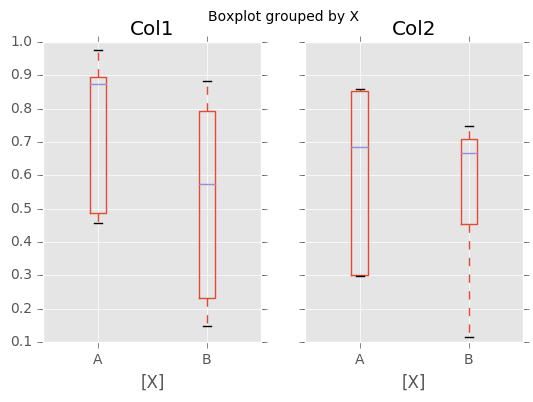

In [47]:
bp = df.boxplot(by='X')

In [48]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
df[:5]

,Col1,Col2,Col3,X,Y
0,0.807907,0.617332,0.472099,A,A
1,0.233289,0.965258,0.561900,A,B
2,0.607049,0.767627,0.842969,A,A
3,0.772123,0.805257,0.547291,A,B
4,0.666137,0.895139,0.255298,A,A


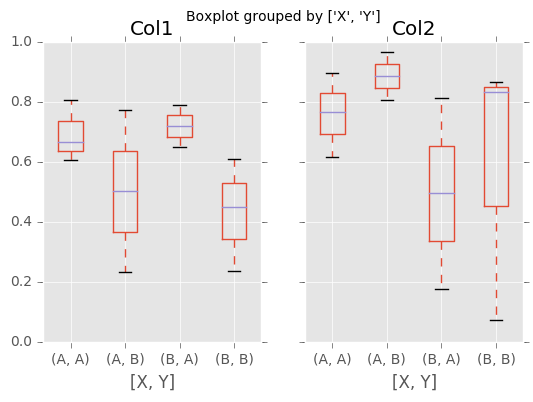

In [49]:
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

In [54]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
df_box[:5]

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


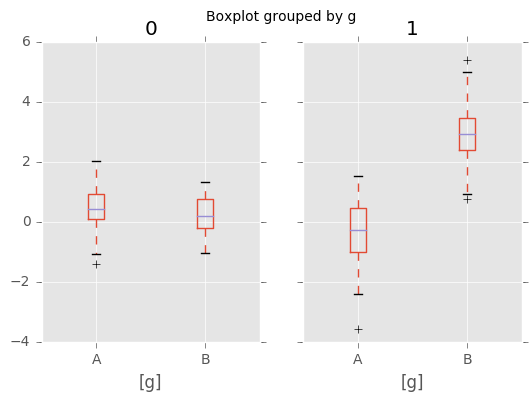

In [55]:
bp = df_box.boxplot(by='g')

D:\software\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


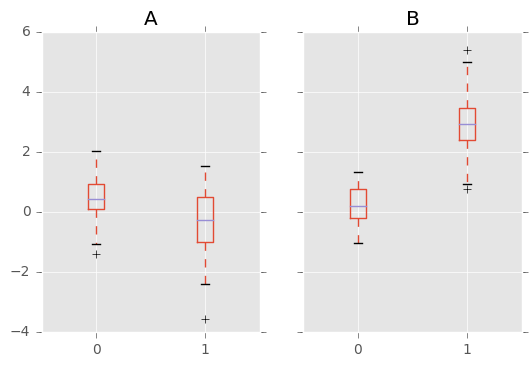

In [52]:
bp = df_box.groupby('g').boxplot()

### 4 面积图

In [56]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df[:5]

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181
3,0.782478,0.761604,0.914403,0.658623
4,0.568368,0.201756,0.698296,0.952195


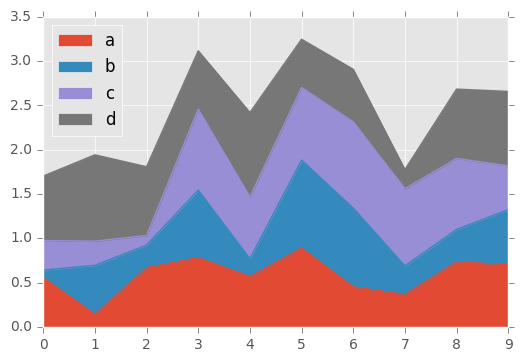

In [57]:
df.plot.area()

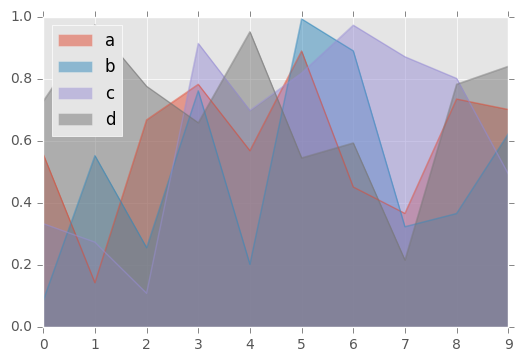

In [58]:
df.plot.area(stacked=False)

### 5 散点图

In [59]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df[:5]

,a,b,c,d
0,0.712097,0.443909,0.031035,0.363240
1,0.730722,0.475567,0.344417,0.640880
2,0.126205,0.171465,0.737086,0.127029
3,0.369650,0.604334,0.103104,0.802374
4,0.945553,0.979039,0.881232,0.627682


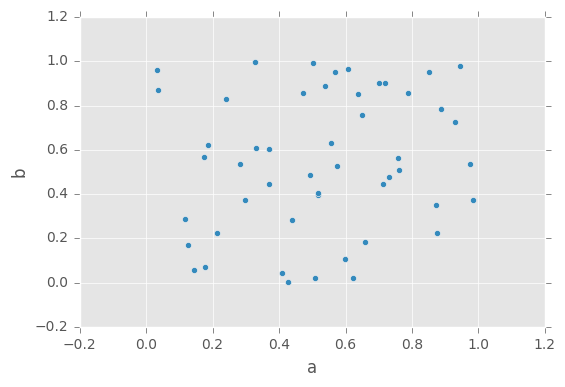

In [60]:
df.plot.scatter(x='a', y='b')

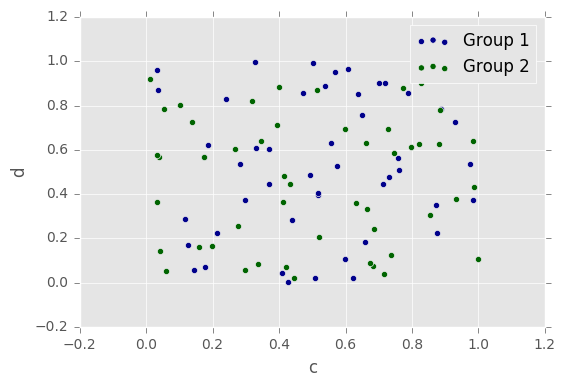

In [61]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

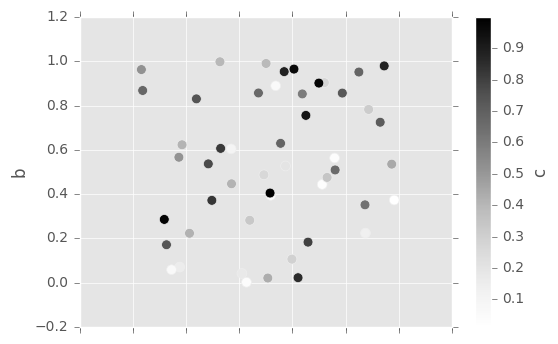

In [62]:
df.plot.scatter(x='a', y='b', c='c', s=50)

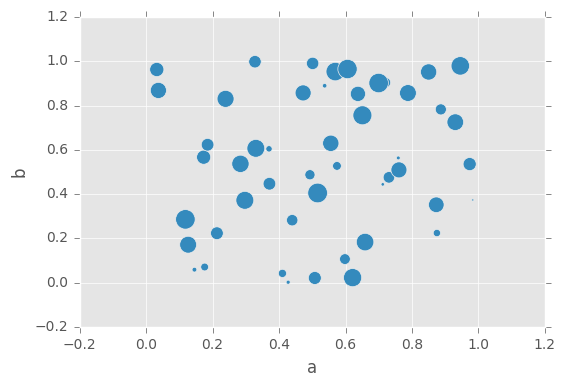

In [63]:
df.plot.scatter(x='a', y='b', s=df['c']*200)

### 6 六边图：Hexagonal Bin Plot

In [64]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df[:5]

,a,b
0,-0.827198,0.914196
1,-0.931163,1.051704
2,0.627872,2.349277
3,0.088349,3.011981
4,0.749476,3.925354


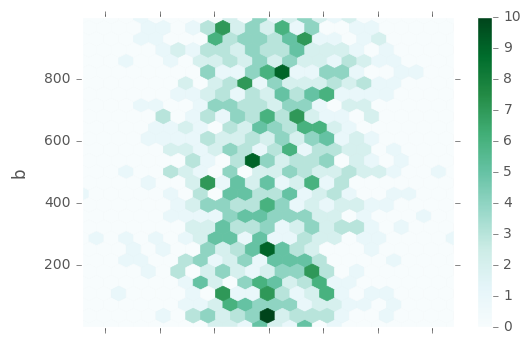

In [65]:
df.plot.hexbin(x='a', y='b', gridsize=25)

In [66]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df[:5]

,a,b,z
0,-0.793893,0.321153,0.051901
1,0.342250,2.618906,2.099913
2,-0.975807,3.918201,1.847558
3,-0.810847,1.594081,2.300502
4,-1.977759,4.461659,2.410117


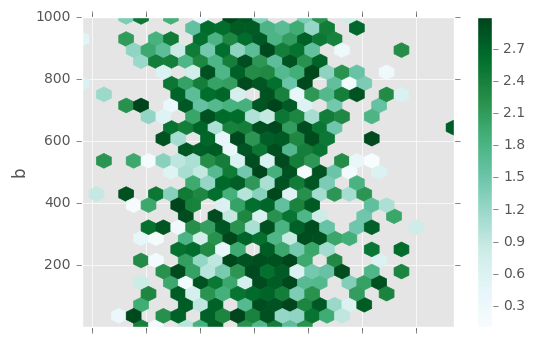

In [67]:
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

### 7 饼图

In [68]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series[:5]

a    2.632870
b    0.125960
c    2.970358
d    2.438139
Name: series, dtype: float64

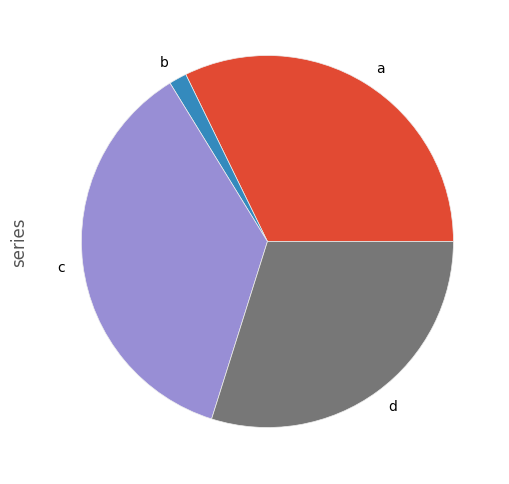

In [69]:
series.plot.pie(figsize=(6, 6))

In [70]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'],columns=['x', 'y'])
df[:5]

,x,y
a,1.723781,1.034762
b,0.228865,2.799262
c,0.217145,2.294694
d,2.883440,2.384940


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002405566BAC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000024056E1C3C8>], dtype=object)

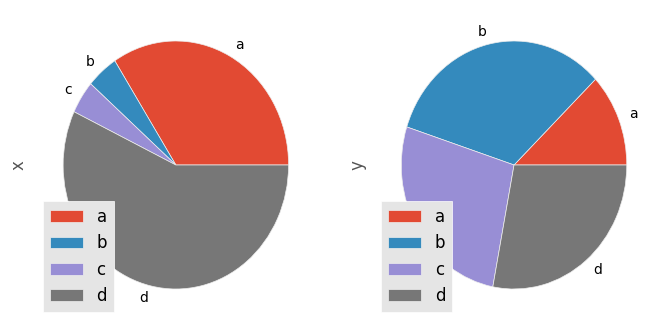

In [71]:
df.plot.pie(subplots=True, figsize=(8, 4))

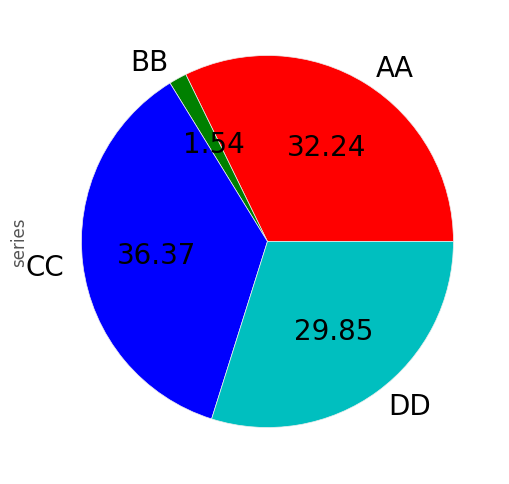

In [72]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                 autopct='%.2f', fontsize=20, figsize=(6, 6))

In [73]:
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series[:5]

a    0.1
b    0.1
c    0.1
d    0.1
Name: series2, dtype: float64

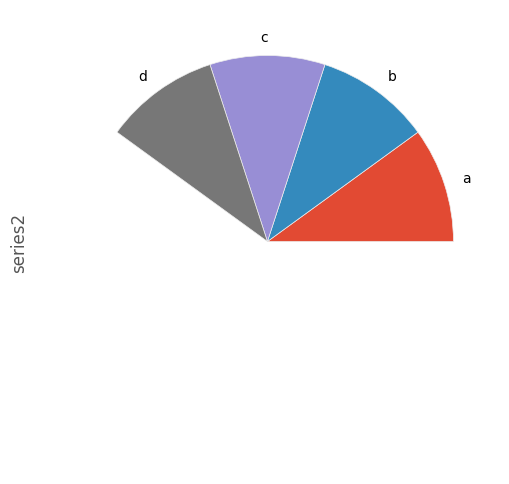

In [74]:
series.plot.pie(figsize=(6, 6))